# 取得股價資料

In [5]:
import numpy as np # 數值計算套件
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt # 畫圖套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差

In [6]:
# 輸入股票代號
stock_id = '5314.two'
# stock_id = '2357.tw'
# stock_id = '2317.tw'
# stock_id = 'AAPL'
# stock_id = 'NVDA'

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=365)

'''抓取特定時間'''
# start = dt.datetime(2020, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 10, 10)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-30,38.000000,38.000000,34.700001,37.000000,36.597584,57000
2023-10-31,36.000000,37.000000,36.000000,37.000000,36.597584,24000
2023-11-01,36.799999,39.049999,36.799999,38.000000,37.586708,35000
2023-11-02,39.500000,40.000000,38.049999,38.700001,38.279095,60000
2023-11-03,38.099998,40.900002,38.099998,38.299999,37.883446,13000
...,...,...,...,...,...,...
2024-10-22,223.000000,228.000000,220.000000,220.500000,220.500000,189000
2024-10-23,223.000000,227.500000,218.000000,220.500000,220.500000,178000
2024-10-24,220.500000,227.000000,211.000000,211.000000,211.000000,239000


# <b>1. 可視化 K 線</b>

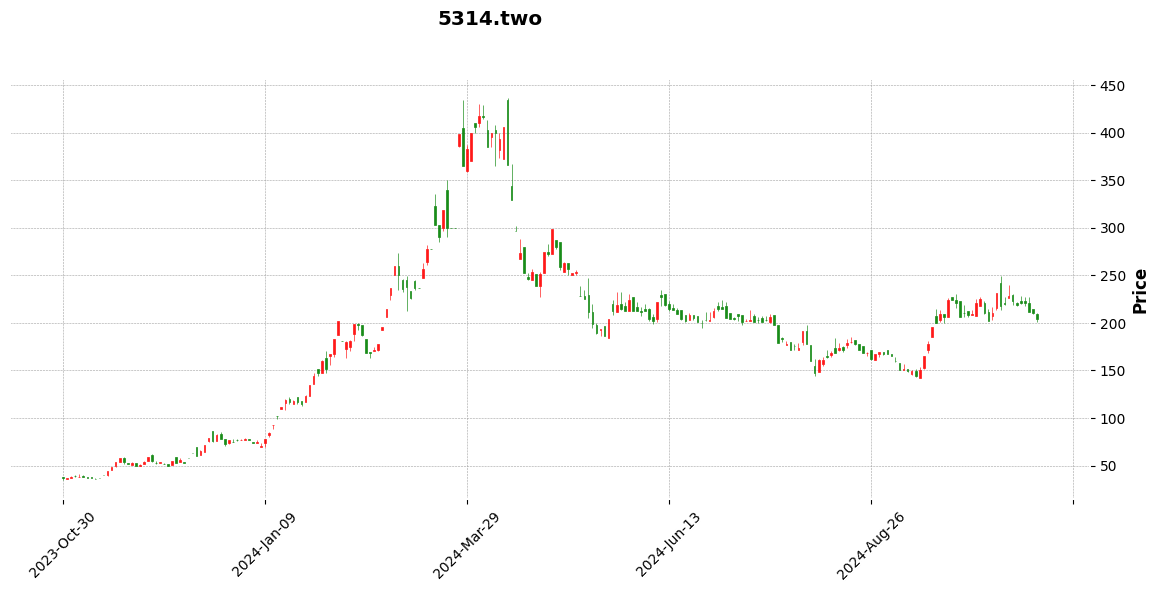

In [7]:
import mplfinance as mpf
import pandas as pd

# 設置k線繪圖風格，漲為紅色，跌為綠色
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='charles',
                marketcolors=my_color)

mpf.plot(stock_data, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 使用 mplfinance 繪製 K 線圖
mpf.plot(stock_data, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6), savefig='k_line.png')

# <b>2. 資料前處理</b>

In [8]:
# 輸入股票代號
stock_id = '5314.two'

# 抓取特定時間
start = dt.datetime(2014, 1, 1)  # 指定的開始日期
end = dt.datetime(2024, 10, 10)    # 指定的結束日期

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,31.306122,32.612244,31.020409,32.244896,31.894197,38981
2014-01-03,33.061226,33.102039,32.040817,32.653061,32.297924,81554
2014-01-06,32.653061,33.469387,32.163265,32.653061,32.297924,41313
2014-01-07,32.653061,32.653061,32.163265,32.448978,32.096058,18025
2014-01-08,32.653061,33.469387,32.653061,33.469387,33.105370,82883
...,...,...,...,...,...,...
2024-10-01,208.000000,213.500000,208.000000,209.500000,209.500000,68000
2024-10-04,207.500000,225.500000,207.500000,220.500000,220.500000,176000
2024-10-07,218.000000,227.500000,218.000000,225.000000,225.000000,122000


## <b>2.1. 擷取與標記</b>

In [ ]:
!pip install mplfinance

In [9]:
from PIL import Image
import random
import os
import pandas as pd
import os
import mplfinance as mpf
    
future_days = 5    # 預測未來幾天的漲跌
window_size = 30  # K線圖的時間窗口

# 定义短期和长期均线的周期
short_window = 5  # 短期均線
long_window = 20  # 長期均線

# K线图保存的文件夹
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 片利數據並生成標籤和 K 線圖
for i in range(len(stock_data) - window_size - future_days):
    window_data = stock_data.iloc[i:i + window_size]  # 当前 K 线图窗口
    future_data = stock_data.iloc[i + window_size:i + window_size + future_days]  # 未來幾天的數據

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]

    print(f'窗口{i}的短期均線: {short_ma}, 長期均線: {long_ma}, 標記為', end='')

    # 判斷漲跌：短期均線高於長期均縣則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 涨
        print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        print('「跌」: 0')

    print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style=my_style, axisoff=True,
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)

窗口0的短期均線: 32.661223602294925, 長期均線: 32.47346906661987, 標記為「漲」: 1

--------------------------------

窗口1的短期均線: 32.6775505065918, 長期均線: 32.46938753128052, 標記為「漲」: 1

--------------------------------

窗口2的短期均線: 32.734693908691405, 長期均線: 32.43673448562622, 標記為「漲」: 1

--------------------------------

窗口3的短期均線: 32.81632690429687, 長期均線: 32.42653036117554, 標記為「漲」: 1

--------------------------------

窗口4的短期均線: 32.938775634765626, 長期均線: 32.416326236724856, 標記為「漲」: 1

--------------------------------

窗口5的短期均線: 33.044898223876956, 長期均線: 32.42244863510132, 標記為「漲」: 1

--------------------------------

窗口6的短期均線: 32.955101776123044, 長期均線: 32.39999952316284, 標記為「漲」: 1

--------------------------------

窗口7的短期均線: 32.955101776123044, 長期均線: 32.38163232803345, 標記為「漲」: 1

--------------------------------

窗口8的短期均線: 32.93877487182617, 長期均線: 32.38775472640991, 標記為「漲」: 1

--------------------------------

窗口9的短期均線: 32.88979568481445, 長期均線: 32.45918340682984, 標記為「漲」: 1

--------------------------------

窗口10

In [10]:
# 顯示漲跌數據筆數
labels_df['label'].value_counts()

label
0    1361
1    1229
Name: count, dtype: int64

## 2.2. 顯示可視化結果

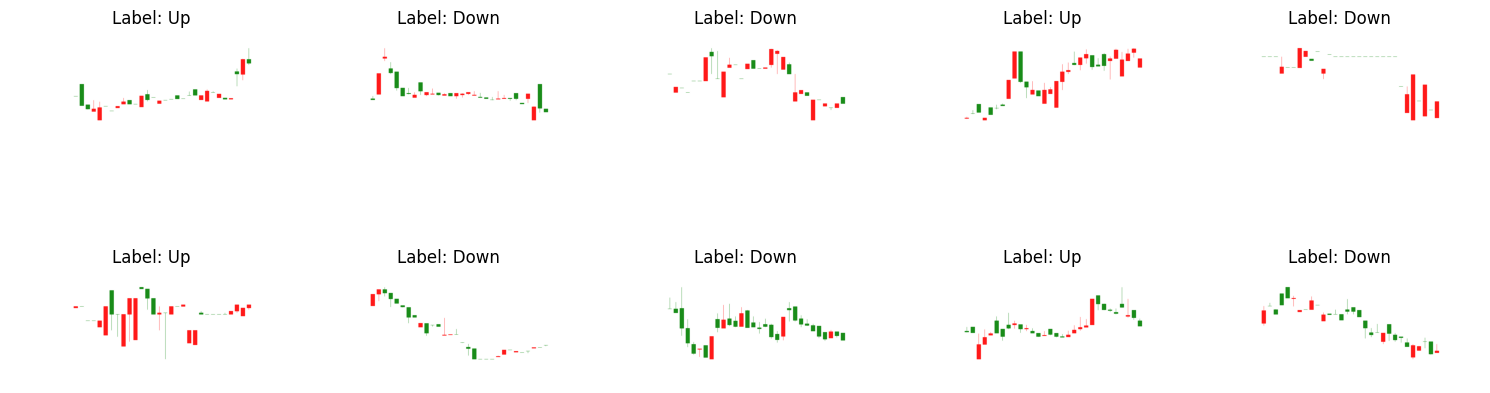

In [11]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

# <b>3. 深度學習 CNN</b>

## <b>3.1. 切分訓練、驗證、測試集</b>

In [12]:
# 用於資料集拆分訓練、驗證、測試
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=1024)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=1024)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# K線圖位置路徑
image_dir = 'k_line_images/'

# 建立資料集生成器
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,     # 隨機選轉
    width_shift_range=0.1,  # 水平平移
    height_shift_range=0.1, # 垂直平移
    zoom_range=0.1,         # 隨機縮放
    horizontal_flip=True,   # 水平翻轉
    validation_split=0.2)   # 20% 當驗證集

In [14]:
# 訓練集生成器
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 驗證集生成器
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 測試集生成器（注意這裡不進行資料增強）
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=False  # 測試集不需要隨機打亂
)

Found 1657 validated image filenames belonging to 2 classes.
Found 415 validated image filenames belonging to 2 classes.
Found 518 validated image filenames belonging to 2 classes.


## <b>3.2. 建立 CNN 模型</b>

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LeakyReLU, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 設定學習率動態調整
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# 建立 CNN 模型
model = Sequential()

model.add(Input(shape=(150, 150, 3)))

# 第一層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第二層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第三層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 加入 Dropout 層來防止過擬合
model.add(Dropout(0.2))

# 展平層
model.add(Flatten())

# 全連接層 + LeakyReLU
model.add(Dense(128))
# 加入 Dropout 層
model.add(Dropout(0.2))

model.add(Dense(64))
# 加入 Dropout 層
model.add(Dropout(0.2))

# 輸出層（使用 sigmoid 進行二元分類）
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## <b>3.3. 訓練模型</b>

In [16]:
# 模型訓練
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[reduce_lr]
)

Epoch 1/50


c:\Users\user\.conda\envs\ForTorch\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.5608 - loss: 11.5350 - val_accuracy: 0.5928 - val_loss: 0.7262 - learning_rate: 0.0010
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.5885 - loss: 4.0550 - val_accuracy: 0.6458 - val_loss: 0.8253 - learning_rate: 0.0010
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.6143 - loss: 1.8012 - val_accuracy: 0.5253 - val_loss: 3.5012 - learning_rate: 0.0010
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 35s 168ms/step - accuracy: 0.6118 - loss: 1.1190 - val_accuracy: 0.6386 - val_loss: 0.6703 - learning_rate: 0.0010
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.6338 - loss: 0.8168 - val_accuracy: 0.6024 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.6133 - loss: 0.8111 - val_accuracy: 0.4843 - val_loss: 1.1195 - learning_rate: 0.0010
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - accuracy: 0.6516 - loss

## <b>3.3. 評估結果</b>

In [17]:
# 測試模型
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.8359 - loss: 0.3623
Test accuracy: 0.8436293601989746


In [35]:
# 獲取一批測試集圖片
test_images, test_labels = next(test_generator)
# 預測測試集
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


實際結果： 漲
預測結果： 跌


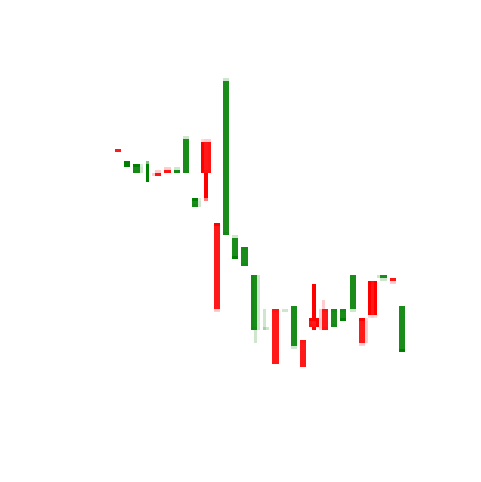

In [36]:
print('實際結果：', '漲' if test_labels[0] == 1 else '跌') # 實際邊謙 0 為跌 1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌') # Sigmoid 0.5 為閾值

plt.figure(figsize=(15, 6))
plt.imshow(test_images[0])
plt.axis('off')
plt.show()